<a href="https://colab.research.google.com/github/kevinball02/HUFS-ML-Project/blob/master/Linear_Regression_KYH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process

## Basic Settings

깃허브에 저장된 API Token을 가져와, kaggle API 커맨드를 실행하여  
데이터를 다운 받자.

In [1]:
!git clone 'https://github.com/kevinball02/HUFS-ML-Project.git'

Cloning into 'HUFS-ML-Project'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 63 (delta 13), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), 6.22 MiB | 6.33 MiB/s, done.


In [2]:
!mkdir -p ~/.kaggle
!mkdir -p ./result
!mv HUFS-ML-Project/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d uciml/autompg-dataset
! unzip autompg-dataset.zip

  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 17.5MB/s]
Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

set_matplotlib_formats('svg')
plt.rcParams['axes.edgecolor'] = 'black'
sns.set_style("whitegrid")

## EDA

In [5]:
raw_data = pd.read_csv('./auto-mpg.csv')
raw_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
raw_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
print(raw_data.duplicated().sum())  # 중복 샘플 수 확인

0


위의 과정에서, 'horsepower' 칼럼의 dtype이 'object'임을 확인할 수 있다.  
이 칼럼을 자세히 살펴 볼 필요가 있겠다.

In [9]:
print(raw_data['horsepower'].unique())  # 데이터 구성 확인

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [10]:
idx = raw_data[raw_data['horsepower'] == '?'].index
raw_data.iloc[idx]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


'horsepower'에서 '?'의 값을 갖는 행이 있음을 발견했다.  
위의 6개 행은 제거하자.

## 결측치 제거

In [11]:
data = raw_data.drop(idx)
data.horsepower = data.horsepower.astype(int)
print('?' in data.horsepower)
data.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [13]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


?를 제거하고, horsepower 칼럼을 정수화 했다.  
이제, feature와 target을 분리하자.

## Sampling

In [14]:
# feature
X = data.drop(['mpg', 'car name'], axis=1)
print(len(X))
X

392


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [15]:
# target
y = pd.DataFrame()
y['mpg'] = data['mpg']
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


## Linear Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

lr = LinearRegression()
best_scores = []

for n in [1,2,3,4,5]:
  poly = PolynomialFeatures(degree=n)
  X_poly = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(
      X_poly, y, random_state=31)

  # Standardizing
  scaler1 = StandardScaler(); scaler2 = StandardScaler()

  scaler1.fit(X_train)
  X_train_s = pd.DataFrame(scaler1.transform(X_train))
  X_test_s = pd.DataFrame(scaler1.transform(X_test))

  scaler2.fit(y_train)
  y_train_s = pd.DataFrame(scaler2.transform(y_train))
  y_test_s = pd.DataFrame(scaler2.transform(y_test))

  # Cross Validation
  neg_mse_scores = cross_val_score(lr, X_train_s, y_train_s,
                                   scoring="neg_mean_squared_error", cv=5)
  print(f'CV_score(neg_mse) of LR with degree {n}: ', neg_mse_scores)
  best_scores.append(neg_mse_scores.max()) # cv=5에서 가장 좋은 score를 기록한다.

print('Best CV_scores of LR (abs): ', np.abs(best_scores))
# 각 차수에 대한 최고 score의 절댓값

CV_score(neg_mse) of LR with degree 1:  [-0.20289639 -0.17871403 -0.19742097 -0.1975968  -0.1699083 ]
CV_score(neg_mse) of LR with degree 2:  [-0.18225224 -0.43533739 -0.24624777 -0.56350886 -0.55864234]
CV_score(neg_mse) of LR with degree 3:  [-0.91284142 -0.18517416 -0.72452781 -0.49365164 -0.39770004]
CV_score(neg_mse) of LR with degree 4:  [ -34.47223228 -258.31995725  -37.63342005 -341.88393854 -303.57258748]
CV_score(neg_mse) of LR with degree 5:  [-147.99252923  -57.65924707  -81.03765691 -113.75470201 -516.87947146]
Best CV_scores of LR (abs):  [ 0.1699083   0.18225224  0.18517416 34.47223228 57.65924707]


따라서, CV_score의 절댓값을 가장 작게 하는 일차식이 최적의 선형 회귀이다.

## Ridge Regularization

In [17]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, random_state=31)

scaler1 = StandardScaler(); scaler2 = StandardScaler()

scaler1.fit(X_train)
X_train_s = pd.DataFrame(scaler1.transform(X_train))
X_test_s = pd.DataFrame(scaler1.transform(X_test))

scaler2.fit(y_train)
y_train_s = pd.DataFrame(scaler2.transform(y_train))
y_test_s = pd.DataFrame(scaler2.transform(y_test))

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

ridge = Ridge(random_state = 31, max_iter = 10000)
alphas = np.logspace(-4, 2, 100)
tuned_parameters = [{'alpha' : alphas}]

ridge = GridSearchCV(ridge, tuned_parameters,
                     cv=5, scoring = "neg_mean_squared_error",
                     refit = True)
ridge.fit(X_train_s, y_train_s)
scores = ridge.cv_results_["mean_test_score"]
scores_std = ridge.cv_results_["std_test_score"]

print("***Ridge coefficient matrix*** \n",
      ridge.best_estimator_.coef_,'\n')

print("***Ridge Best Estimator*** \n",
      ridge.best_estimator_,'\n')

y_predicted_dummy = ridge.predict(X_test_s)
mse = mean_squared_error(y_test_s, y_predicted_dummy)
print("***Ridge MSE*** \n", mse)

***Ridge coefficient matrix*** 
 [[ 0.         -0.04659284 -0.12588126  0.08821885 -0.1738266  -0.28993239
  -0.03712188  0.00630238 -0.05060156 -0.04084569  0.03137589 -0.00093908
  -0.05959351 -0.08564721  0.06836611 -0.03501065 -0.00685487  0.00343348
  -0.1686619  -0.11059098  0.08373039  0.02482433  0.02862657 -0.0215426
  -0.05498063  0.06219507 -0.01147589 -0.17382461 -0.22115776 -0.07664061
  -0.14204946 -0.01190018  0.03240293  0.14899549  0.00725949 -0.07790882
   0.02052398  0.02470088 -0.00958315  0.06163856  0.10769028 -0.06579235
  -0.20816624 -0.01072361 -0.03128065  0.04891512  0.11876388 -0.00914838
  -0.06632905 -0.02883232  0.05339647  0.11579261 -0.00884255  0.07382681
   0.0835148   0.13107941 -0.00829712 -0.05048042  0.08105916  0.06222146
   0.04298306 -0.06680772  0.06160416  0.03606172 -0.07695256 -0.07932756
  -0.00350885  0.15355772  0.03409423  0.01052024 -0.0573048   0.02728267
   0.10036771  0.00769166  0.10889766  0.04836789  0.11806012  0.0402348
   0.08

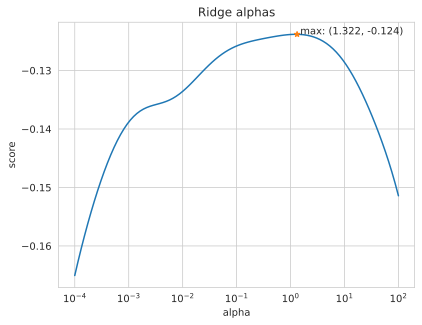

In [19]:
best_alpha = ridge.best_estimator_.alpha
best_score = scores.max()
# optimal point (alpha, score)

plt.figure()
plt.semilogx(alphas, scores)
plt.plot(best_alpha, best_score, marker='*')
plt.text(best_alpha, best_score,
         f' max: {best_alpha.round(3), best_score.round(3)}')
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge alphas")
plt.savefig('ridge_alphas.jpg',dpi=200,bbox_inches='tight')

따라서, 최적의 알파(penalty) 값은 1.322 이다.